In [3]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [4]:
# Remove NaN functions

# Given a dataframe, removes all rows that have NaN data.
def remove_nan_rows(df):
    return df.dropna(axis = 0)

# Given a dataframe, replace all NaNs with a summary statistic of your choice.
def replace_nan_with_mean(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if df_copy[col].isna().any():
            df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    return df_copy

# Given a column of categorical data and an exhaustive list of labels, returns a one-hot encoding.
def one_hot_encode(name):
    column = df[name]
    labels = column.unique()
    return pd.get_dummies(column, prefix=column.name).reindex(columns=[f"{column.name}_{label}" for label in labels], fill_value=0)

def label_encode(column):
    # Get the unique labels in the column
    labels = column.unique()
    
    # Create a dictionary to map each label to a unique number
    label_dict = {label: idx for idx, label in enumerate(labels)}
    
    # Map the column values to the corresponding numbers
    return column.map(label_dict)


In [5]:
# Import Data set and clean 

df = pd.read_csv('atp_matches_2024.csv')
# Replace NaN values with mean
df = df.drop(columns=['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry'])
df = remove_nan_rows(df)
print(df.columns)
print(df.shape)
df.head()

categorical_columns = ["tourney_name", "winner_name", "loser_name", "surface", "winner_hand", "loser_hand", "tourney_level", "winner_ioc", "loser_ioc", "round"]
for name in categorical_columns:
    df[name + '_encoded'] = label_encode(df[name])
print(df.columns)

df["round"].head()


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')
(2761, 45)
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
       'round', 'minu

0     F
1    SF
2    SF
3    QF
4    QF
Name: round, dtype: object

In [6]:
df.columns
print(df.dtypes)


tourney_id                object
tourney_name              object
surface                   object
draw_size                  int64
tourney_level             object
tourney_date               int64
match_num                  int64
winner_id                  int64
winner_name               object
winner_hand               object
winner_ht                float64
winner_ioc                object
winner_age               float64
loser_id                   int64
loser_name                object
loser_hand                object
loser_ht                 float64
loser_ioc                 object
loser_age                float64
score                     object
best_of                    int64
round                     object
minutes                  float64
w_ace                    float64
w_df                     float64
w_svpt                   float64
w_1stIn                  float64
w_1stWon                 float64
w_2ndWon                 float64
w_SvGms                  float64
w_bpSaved 

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop(columns=['match_num', 'tourney_date', 'tourney_name_encoded', 'round', 'tourney_id', 'score', 'surface_encoded', "tourney_name", "winner_name", "loser_name", "surface", "winner_hand", "loser_hand", "tourney_level", "winner_ioc", "loser_ioc"])
y = df['surface_encoded']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Optional: Cross-Validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest CV Accuracy:", cv_scores.mean())

importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("Top Feature Importances:")
print(feature_importances.sort_values(by='Importance', ascending=False).head(10))


Random Forest Classifier Results:
Accuracy: 0.6972255729794934
Confusion Matrix:
 [[462  26   6]
 [125 110   1]
 [ 85   8   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.94      0.79       494
           1       0.76      0.47      0.58       236
           2       0.46      0.06      0.11        99

    accuracy                           0.70       829
   macro avg       0.64      0.49      0.49       829
weighted avg       0.68      0.70      0.65       829

Random Forest CV Accuracy: 0.7034127271023282
Top Feature Importances:
                Feature  Importance
9                 w_ace    0.066533
0             draw_size    0.051297
18                l_ace    0.046292
36   winner_ioc_encoded    0.040587
31  winner_name_encoded    0.037287
28   winner_rank_points    0.034974
3            winner_age    0.034186
32   loser_name_encoded    0.034062
8               minutes    0.033285
27          winner_rank    0.031286


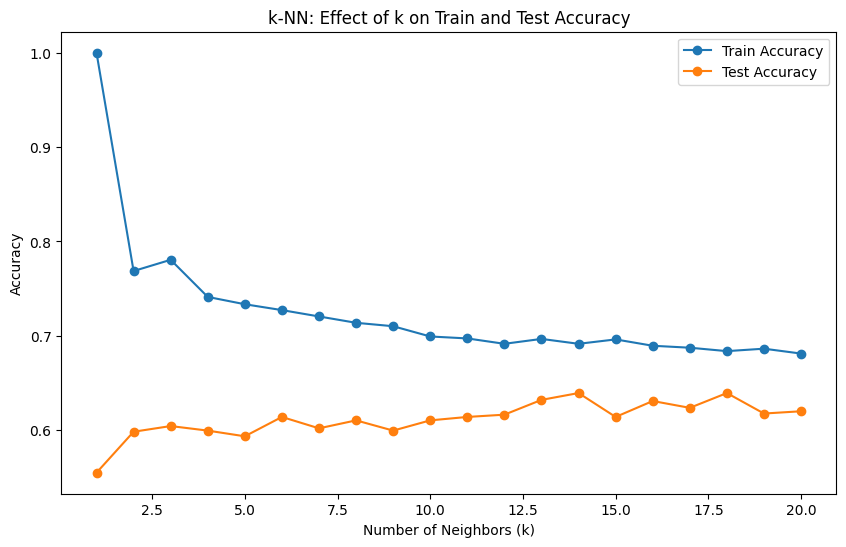

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Explore a range of k values
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker="o", label="Train Accuracy")
plt.plot(k_values, test_scores, marker="o", label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN: Effect of k on Train and Test Accuracy")
plt.legend()
plt.show()


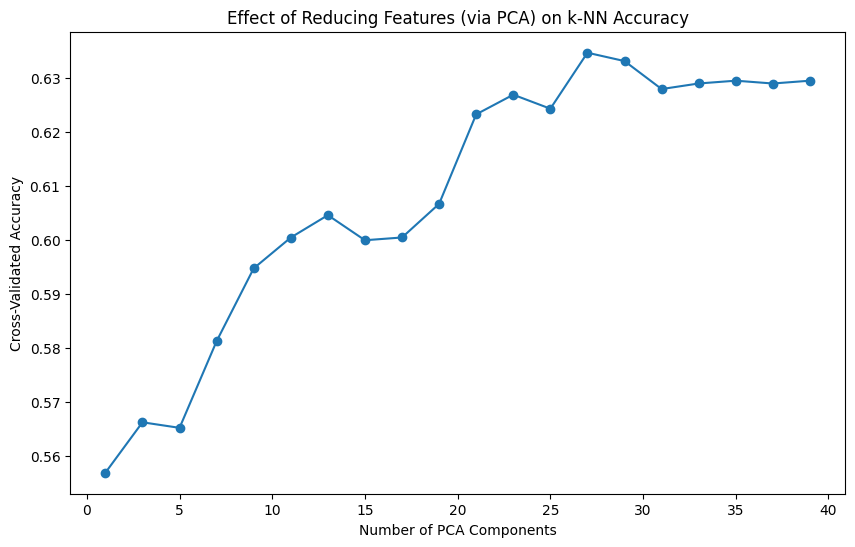

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Evaluate accuracy versus number of principal components
n_components_list = range(1, X_train_scaled.shape[1] + 1, 2)
pca_scores = []

for n in n_components_list:
    pca = PCA(n_components=n)
    knn = KNeighborsClassifier(n_neighbors=5)  # Using fixed k=5 for example
    pipe = Pipeline([('pca', pca), ('knn', knn)])
    score = cross_val_score(pipe, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    pca_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(n_components_list, pca_scores, marker="o")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Effect of Reducing Features (via PCA) on k-NN Accuracy")
plt.show()


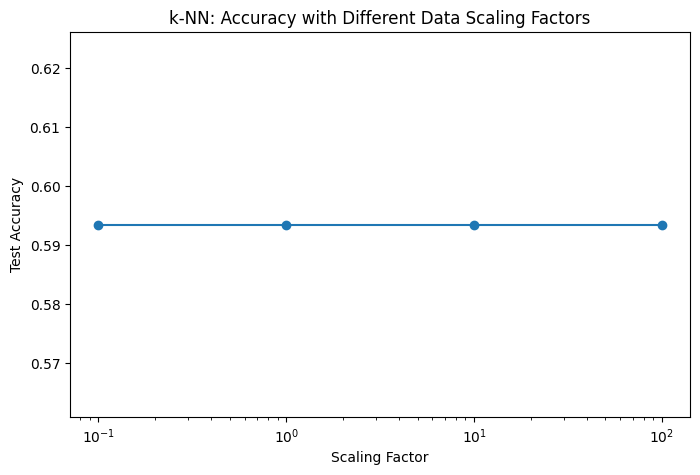

Accuracy with standard data: 0.5934861278648975
Accuracy with scaled data (factor 10): 0.5934861278648975


In [10]:
# Use k-NN with fixed k (e.g., k=5) on differently scaled data.
knn = KNeighborsClassifier(n_neighbors=5)

# Accuracy on standardized data:
score_std = knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

# Rescale by a factor of 10:
X_train_scaled_10 = X_train_scaled * 10
X_test_scaled_10 = X_test_scaled * 10
score_scaled_10 = knn.fit(X_train_scaled_10, y_train).score(X_test_scaled_10, y_test)

# Experiment with various scaling factors:
scaling_factors = [0.1, 1, 10, 100]
accs = []
for factor in scaling_factors:
    X_train_fact = X_train_scaled * factor
    X_test_fact = X_test_scaled * factor
    acc = knn.fit(X_train_fact, y_train).score(X_test_fact, y_test)
    accs.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(scaling_factors, accs, marker='o')
plt.xlabel("Scaling Factor")
plt.ylabel("Test Accuracy")
plt.title("k-NN: Accuracy with Different Data Scaling Factors")
plt.xscale("log")  # log-scale to visualize wide ranges
plt.show()

print("Accuracy with standard data:", score_std)
print("Accuracy with scaled data (factor 10):", score_scaled_10)


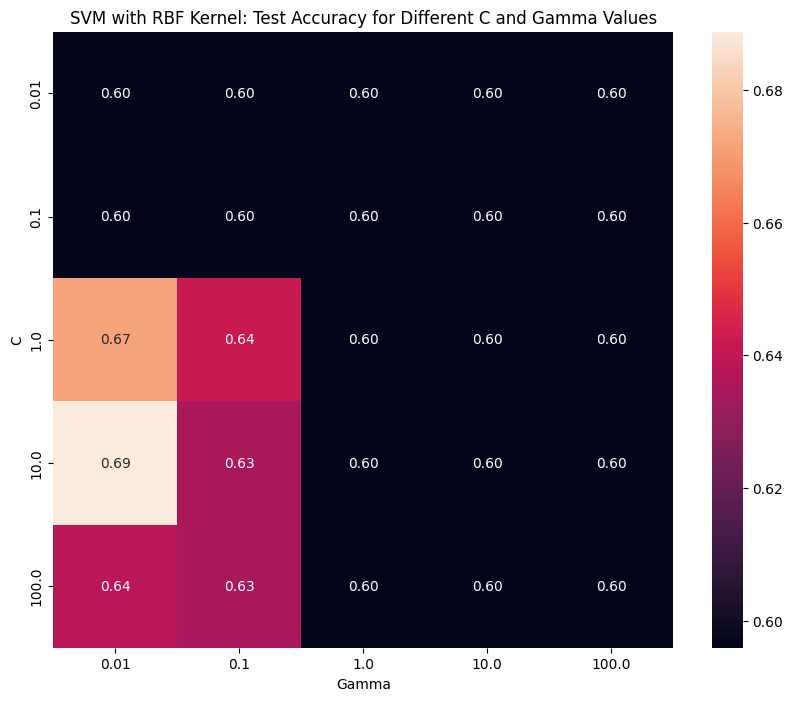

In [11]:
from sklearn.svm import SVC
import seaborn as sns

# Define ranges for C and gamma:
C_values = np.logspace(-2, 2, 5)    # e.g., [0.01, 0.1, 1, 10, 100]
gamma_values = np.logspace(-2, 2, 5)  # similar range

accuracy_results = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        # You can use cross-validation here or a simple train-test score:
        svm.fit(X_train_scaled, y_train)
        accuracy_results[i, j] = svm.score(X_test_scaled, y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_results, annot=True, fmt=".2f", xticklabels=gamma_values, yticklabels=C_values)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('SVM with RBF Kernel: Test Accuracy for Different C and Gamma Values')
plt.show()

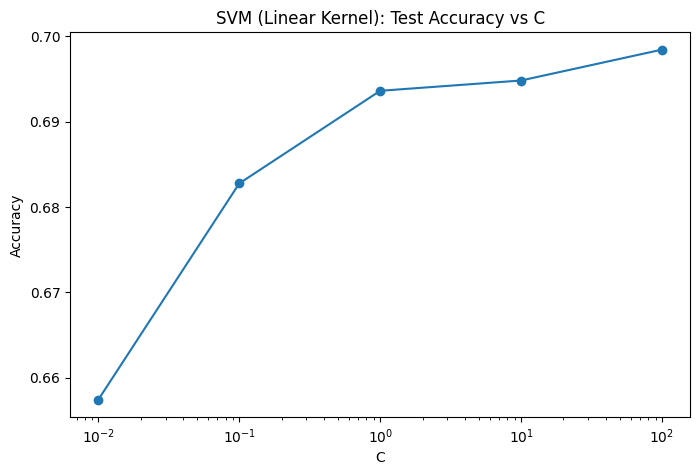

In [12]:
C_values_linear = np.logspace(-2, 2, 5)
linear_acc = []

for C in C_values_linear:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train_scaled, y_train)
    linear_acc.append(svm_linear.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 5))
plt.plot(C_values_linear, linear_acc, marker='o')
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM (Linear Kernel): Test Accuracy vs C")
plt.show()